

# Project: Investigating the Show to Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 The No Show to Appointment dataset is from 100 thousand medical appointment in Brazil, showing the demographic information of the patients whom had show to their appointments and those who hadn't, from 29th of April to 8th of June. These information include: gender, age, neighborhood and health status.

To ba able to understand different attributes role in understanding which patient shows to their appointments some questions need to be studied. Q1:Do receiving a SMS increase the chance of patient showing to their appointments?
And Q2:What is the show to appointment rate for  patient relating to their age ?




In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd 
import random
from datetime import datetime as dt
from pprint import pprint

import seaborn.set() as sns
% matplotlib inline

SyntaxError: invalid syntax (<ipython-input-4-e660d76af2fc>, line 15)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [192]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
no_show = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')    
        
no_show.head(5) # show few rows to understand the data

    
  
     


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [193]:
no_show.describe(include='all') # To understand the detailes  of each column in statically 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [194]:
## the age column has a value of -1 which is an outlair 


In [195]:
no_show.info() # to check for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From discovaring the No show appointment dataset through the formulas up we can conclude that this dataset has no null data. But there is a couple of issues about it like that the ScheduledDay and AppointmentDay class are object and they supposed to be DateTime while PatientId and AppointmentID are float and int and they suppose to be object class. And the age column has a value of -1 which is an outlair .



### Data Cleaning : Changing the data class and removing the outliers 

In [196]:

# Changing the class 
no_show.AppointmentDay = no_show.AppointmentDay.apply(np.datetime64)
no_show.ScheduledDay   = no_show.ScheduledDay.apply(np.datetime64)

no_show.PatientId = no_show.PatientId.astype(object)
no_show.AppointmentID = no_show.AppointmentID.astype(object)



In [197]:
## changing the No-show column to int and giving the Yes, No a numric value to be able to have 
no_show['No-show'].replace({'No':0,'Yes':1},inplace=True)
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 11.8+ MB


In [198]:
no_show = no_show[no_show.Age > 0]
no_show.shape
no_show.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.069870e+05,106987.0,106987,106987,106987,106987.000000,106987,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
unique,6.027000e+04,106987.0,2,100307,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8.221459e+14,5767167.0,F,2016-05-06 07:09:54,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8.800000e+01,1.0,70118,24,4528,NaN,7586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2015-11-10 07:13:56,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-06-08 20:07:23,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,38.316085,NaN,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,0.202641
std,NaN,NaN,NaN,NaN,NaN,22.466214,NaN,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,0.401969
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<a id='eda'></a>
## Exploratory Data Analysis





### Research Question 1 Do receiving a SMS increase the chance of patient showing to their appointments?

0    85307
1    21680
Name: No-show, dtype: int64


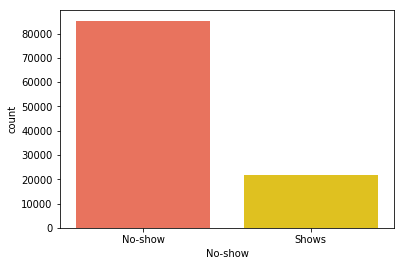

In [199]:
## now  i am going to show whom showed and didn't show to the appointment
def show_No():

    noshow = 0
    for value in no_show['No-show']:
        if value == 1:
            noshow += 1

print (no_show['No-show'].value_counts())
color=["tomato","gold"]
ax=sns.countplot(x='No-show', data=no_show, palette=color)
ax.set_xticklabels(["No-show","Shows"])
show_No()

In [200]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
noshow1 = no_show.groupby('SMS_received')['No-show'].agg(['count'])

noshow1.reset_index(inplace=True)
noshow1.columns = ['appt_status', 'total']
noshow1.iloc[0,0] = "No Show"
noshow1.iloc[1,0] = "Show"

SMS_prop = noshow1.iloc[0,1] / (noshow1.iloc[0,1] + noshow1.iloc[1,1])
shows_prop = noshow1.iloc[1,1] / (noshow1.iloc[0,1] + noshow1.iloc[1,1])

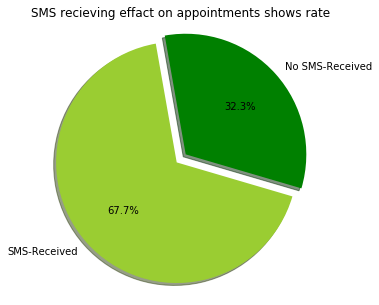

In [201]:

labels = ['SMS-Received', 'No SMS-Received']
sizes = [SMS_prop,shows_prop]
colors = ['yellowgreen', 'green',]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100)

plt.title('SMS recieving effact on appointments shows rate')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);        

In [202]:

#The SMS received patient shows 67.7% of the time
# while the patient that didn't recive SMS showed to apppointment 32.3% of the time
#The count of each shows is only  21680 and no shows group is   85307


### Research Question 2  What is the show to appointment rate for  patient relating to their age ?

In [207]:

def prob_show(dataset, group_by):    
    no_show = pd.crosstab(index = dataset[group_by], columns = dataset['No-show']).reset_index()
   
    no_show['probShowUp'] = no_show[0] / (no_show[1] + no_show[0])
    return no_show[[group_by, 'probShowUp']]

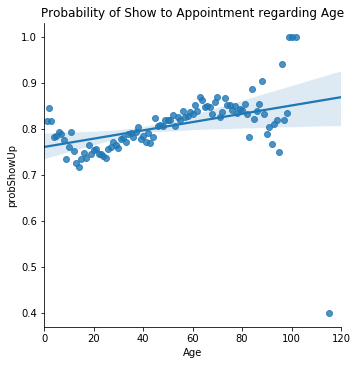

In [208]:

sns.lmplot(data = prob_show(no_show, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 120)
plt.title('Probability of Show to Appointment regarding Age')
plt.show()

We can see that patientstowerds their 20's show less to their appointment abdthen start rasing untill patient's in the age odf 60's and 70's then we can see that probability drop again 
<a id='conclusions'></a>
## Conclusions

- The patients receving SMS are more than the ones not receving SMS

- Patient shows up to their appointments increase by age 


Limitations of dataset


- outliers in data.
- wrong calssofication for the data type.
- comparing two independent variable(gender and age) to a dependent variable show rate.



In [169]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0